# Understanding Facebook Ads by Using Multiple Regression
## by Sophie Li
### APRD6342 Python Exercise 5

In [4]:
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
csvfile = 'Travel Pony Facebook.csv'
tpf = pd.read_csv(csvfile)

### First, remove rows that have 0 amount spent.

In [5]:
newtpf = tpf.loc[tpf['Amount Spent (USD)'] != 0]

### Next, graph a histogram of Amount Spent using Seaborn. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


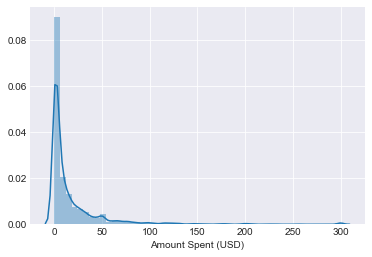

In [6]:
sns.set_style('darkgrid')
sns.distplot(newtpf['Amount Spent (USD)']) # Distribution Plot

### 2.  Build a multiple regression (links to an external site) where the outcome variable(Y) is: 
   #### Amount Spent 
### and the predictor variables(X) are: 
   #### Campaign Name
   #### Reach
   #### Frequency
   #### Impressions
   #### Clicks
   #### Unique Clicks
   #### Page Likes
   #### Page Engagement
   #### Post Engagement
   #### Post Likes
   #### Post Comments
   #### Post Shares
   #### Photo Views
   #### Website Clicks

In [7]:
# Campaign Name -- Categorical Variable 
newtpf['Campaign Name'] = newtpf['Campaign Name'].astype('category')
newtpf['Campaign_Code'] = newtpf['Campaign Name'].cat.codes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
x = newtpf[['Campaign_Code', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks'
         , 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes'
         , 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
y = newtpf['Amount Spent (USD)']

In [9]:
# Regression Model
x = sm.add_constant(x)
x.shape
linreg=sm.OLS(y,x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1743.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:38:21   Log-Likelihood:                -6591.5
No. Observations:                1802   AIC:                         1.321e+04
Df Residuals:                    1788   BIC:                         1.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2165      1.531     

### 3. Look at the coefficients for each one of your predictor variables. 
### The higher the value, the stronger predictive value the variable has with amount spent. 
### That is, when we spend more, we tend to get more of this variable than anything else. 

In [11]:
coefs = pd.DataFrame({ 'coef': [0.0135, 0.0036, 4.4988, -0.0013, -0.1742, 
                                0.3073, 23.0417, -19.7454, 16.8084, 2.3714, 
                                3.4253, 4.4798, 3.1556, 3.3764]}, 
                        index=['Campaign_Code',
                               'Reach',
                               'Frequency',
                               'Impressions',
                               'Clicks',
                               'Unique Clicks',
                               'Page Likes',
                               'Page Engagement',
                               'Post Engagement',
                               'Post Likes',
                               'Post Comments',
                               'Post Shares', 
                               'Photo Views',
                               'Website Clicks'])
coefs.sort_values('coef', ascending=False )  

,coef
Page Likes,23.0417
Post Engagement,16.8084
Frequency,4.4988
Post Shares,4.4798
Post Comments,3.4253
Website Clicks,3.3764
Photo Views,3.1556
Post Likes,2.3714
Unique Clicks,0.3073
Campaign_Code,0.0135


### Therefore, the three predictors with the highest predictive value are:
### 1. Page Likes
### 2. Post Engagement
### 3. Frequency          